In [2]:
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# Remove dodgy images

In [9]:
import cv2
import imghdr

C:\Users\swast\AppData\Local\Temp\ipykernel_7104\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = r"C:\Users\swast\OneDrive\Desktop\Image Classification CNN\Data"

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
os.listdir(data_dir)

['Happy', 'Sad']

In [26]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list C:\Users\swast\OneDrive\Desktop\Image Classification CNN\Data\Happy\192px.svg
Image not in ext list C:\Users\swast\OneDrive\Desktop\Image Classification CNN\Data\Happy\7-Habits-of-Happy-People-image.jpeg
Image not in ext list C:\Users\swast\OneDrive\Desktop\Image Classification CNN\Data\Happy\happiness_thumbnail.jpg
Image not in ext list C:\Users\swast\OneDrive\Desktop\Image Classification CNN\Data\Happy\Happy20People.jpg
Image not in ext list C:\Users\swast\OneDrive\Desktop\Image Classification CNN\Data\Happy\traitshappypeople.jpg.webp
Image not in ext list C:\Users\swast\OneDrive\Desktop\Image Classification CNN\Data\Happy\vector.svg
Image not in ext list C:\Users\swast\OneDrive\Desktop\Image Classification CNN\Data\Happy\vector10.svg
Image not in ext list C:\Users\swast\OneDrive\Desktop\Image Classification CNN\Data\Happy\vector11.svg
Image not in ext list C:\Users\swast\OneDrive\Desktop\Image Classification CNN\Data\Happy\vector12.svg
Image not in ext list C:\

# Data Load

In [14]:
tf.data.Dataset??

In [27]:
import numpy as np
from matplotlib import pyplot as plt

In [61]:
data = tf.keras.utils.image_dataset_from_directory(r"C:\Users\swast\OneDrive\Desktop\Image Classification CNN\Data")

Found 299 files belonging to 2 classes.


In [62]:
data_iterator = data.as_numpy_iterator()

In [63]:
batch = data_iterator.next()

In [64]:
batch[1]
# 0 - Happy 
# 1 - Sad

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1])

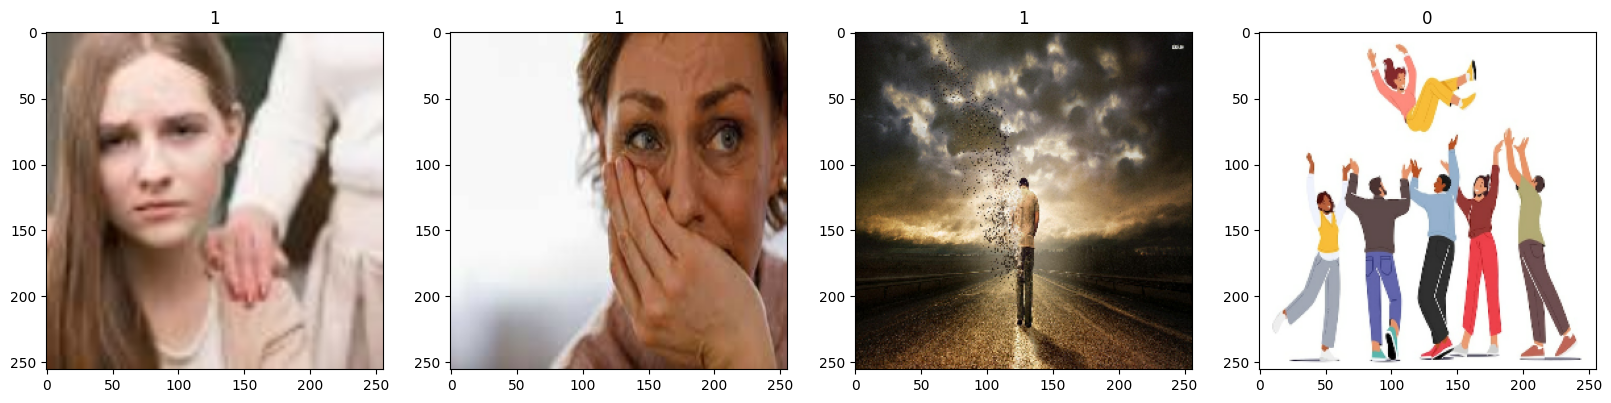

In [65]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data

In [66]:
data = data.map(lambda x,y: (x/255, y))

In [67]:
data.as_numpy_iterator().next()

(array([[[[0.12095588, 0.10526961, 0.10919118],
          [0.12251838, 0.10579044, 0.11023284],
          [0.15425858, 0.12420343, 0.1342218 ],
          ...,
          [0.24031958, 0.24031958, 0.24031958],
          [0.22430204, 0.22430204, 0.22430204],
          [0.18573548, 0.18573548, 0.18573548]],
 
         [[0.13933824, 0.1302696 , 0.13419117],
          [0.1437701 , 0.12792107, 0.13192402],
          [0.16798694, 0.1463848 , 0.15309437],
          ...,
          [0.21988358, 0.21988358, 0.21988358],
          [0.20792452, 0.20792452, 0.20792452],
          [0.17429534, 0.17429534, 0.17429534]],
 
         [[0.16988358, 0.16204044, 0.16596201],
          [0.16883616, 0.155913  , 0.15983456],
          [0.18777573, 0.16773897, 0.17383578],
          ...,
          [0.19362745, 0.19362745, 0.19362745],
          [0.18872836, 0.18872836, 0.18872836],
          [0.16409409, 0.16409409, 0.16409409]],
 
         ...,
 
         [[0.16623774, 0.1395211 , 0.07631548],
          [0.10380

# Train Data

In [68]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [79]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Build Deep Learning Model

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [71]:
model=Sequential()

In [73]:
# Model Architecture
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [74]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# Train

In [76]:
logs=r"C:\Users\swast\OneDrive\Desktop\Image Classification CNN\Logs"

In [77]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logs)

In [80]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 14s 1s/step - loss: 0.7083 - accuracy: 0.5089 - val_loss: 0.6094 - val_accuracy: 0.7969
Epoch 2/20
7/7 [==============================] - 10s 1s/step - loss: 0.5811 - accuracy: 0.7589 - val_loss: 0.5315 - val_accuracy: 0.6875
Epoch 3/20
7/7 [==============================] - 10s 1s/step - loss: 0.4869 - accuracy: 0.7857 - val_loss: 0.3970 - val_accuracy: 0.8906
Epoch 4/20
7/7 [==============================] - 10s 1s/step - loss: 0.3896 - accuracy: 0.8304 - val_loss: 0.2524 - val_accuracy: 0.9062
Epoch 5/20
7/7 [==============================] - 10s 1s/step - loss: 0.2440 - accuracy: 0.8750 - val_loss: 0.2153 - val_accuracy: 0.9062
Epoch 6/20
7/7 [==============================] - 10s 1s/step - loss: 0.2102 - accuracy: 0.9107 - val_loss: 0.2031 - val_accuracy: 0.9062
Epoch 7/20
7/7 [==============================] - 10s 1s/step - loss: 0.1709 - accuracy: 0.9375 - val_loss: 0.1396 - val_accuracy: 0.9531
Epoch 8/20
7/7 [==================

In [84]:
hist.history

{'loss': [0.7083354592323303,
  0.5811314582824707,
  0.486947625875473,
  0.3895547091960907,
  0.24400211870670319,
  0.21015150845050812,
  0.17087878286838531,
  0.1652422696352005,
  0.11680609732866287,
  0.08129702508449554,
  0.0443328395485878,
  0.029018277302384377,
  0.017899544909596443,
  0.020625555887818336,
  0.012956298887729645,
  0.007942268624901772,
  0.01970655284821987,
  0.01002830732613802,
  0.01742870919406414,
  0.023814436048269272],
 'accuracy': [0.5089285969734192,
  0.7589285969734192,
  0.7857142686843872,
  0.8303571343421936,
  0.875,
  0.9107142686843872,
  0.9375,
  0.9330357313156128,
  0.9598214030265808,
  0.9732142686843872,
  0.9955357313156128,
  0.9910714030265808,
  1.0,
  0.9955357313156128,
  1.0,
  1.0,
  0.9955357313156128,
  0.9955357313156128,
  0.9955357313156128,
  0.9910714030265808],
 'val_loss': [0.6093769073486328,
  0.5315451622009277,
  0.3970336616039276,
  0.2524195909500122,
  0.21530354022979736,
  0.20310495793819427,
  0

# Visual Representation

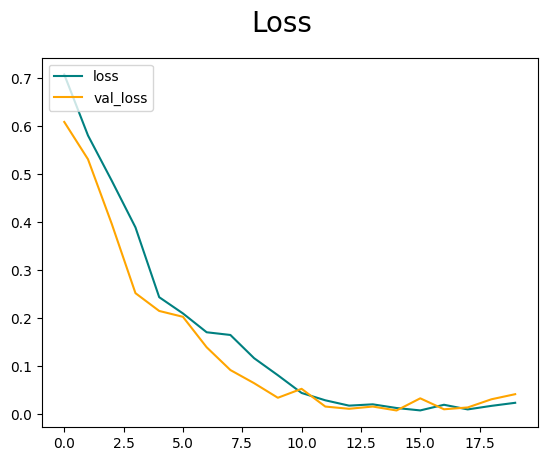

In [85]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [86]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [87]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [88]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 253ms/step


In [89]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# Test

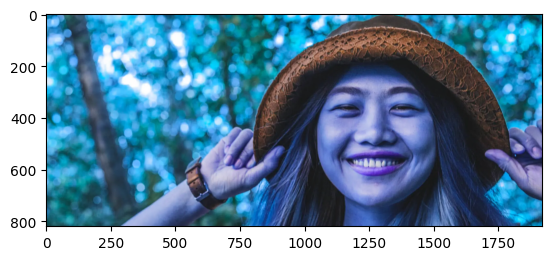

In [101]:
img = cv2.imread(r"C:\Users\swast\Downloads\happytest2.jpg")
plt.imshow(img)
plt.show()

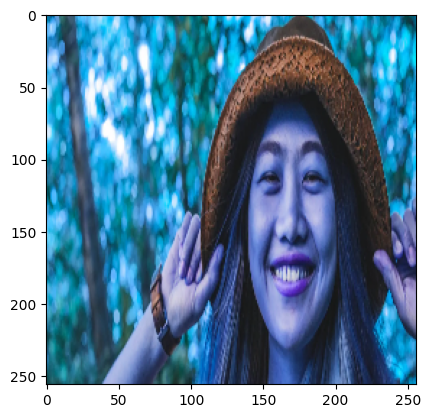

In [102]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [103]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 49ms/step


In [104]:
yhat

array([[0.39436567]], dtype=float32)

In [105]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
